In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

170498071/170498071 [==============================] - 17s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 42s 64ms/step - loss: 1.6077 - accuracy: 0.4122 - val_loss: 1.3888 - val_accuracy: 0.5090
Epoch 2/10
625/625 [==============================] - 41s 65ms/step - loss: 1.2362 - accuracy: 0.5617 - val_loss: 1.1894 - val_accuracy: 0.5784
Epoch 3/10
625/625 [==============================] - 43s 69ms/step - loss: 1.0858 - accuracy: 0.6179 - val_loss: 1.0576 - val_accuracy: 0.6303
Epoch 4/10
625/625 [==============================] - 41s 66ms/step - loss: 0.9841 - accuracy: 0.6526 - val_loss: 0.9681 - val_accuracy: 0.6630
Epoch 5/10
625/625 [==============================] - 41s 66ms/step - loss: 0.9159 - accuracy: 0.6783 - val_loss: 0.9274 - val_accuracy: 0.6791
Epoch 6/10
625/625 [==============================] - 40s 65ms/step - loss: 0.8594 - accuracy: 0.6966 - val_loss: 0.9350 - val_accuracy: 0.6699
Epoch 7/10
625/625 [==============================] - 42s 67ms/step - loss: 0.8019 - accuracy: 0.7193 - val_loss: 0.8989 - val_accuracy:

Enter an index (0 to 9999) for a test image: 7
1/1 [==============================] - 0s 224ms/step


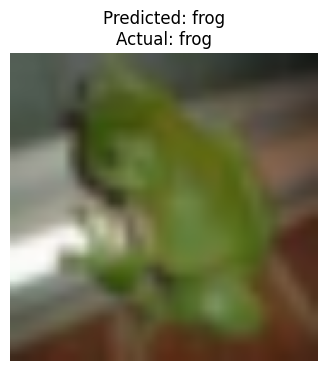

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

try:
    index_str = input(f"Enter an index (0 to {len(x_test)-1}) for a test image: ")
    index = int(index_str)
    if not 0 <= index < len(x_test):
        print(f"Index out of range. Using index 0 by default.")
        index = 0
except ValueError:
    print("Invalid input. Please enter a number. Using index 0 by default.")
    index = 0

test_image = x_test[index]
true_label_index = np.argmax(y_test[index])

prediction_input = np.expand_dims(test_image, axis=0)
prediction = model.predict(prediction_input)
predicted_label_index = np.argmax(prediction)

plt.figure(figsize=(4, 4))
resized_image = tf.image.resize(test_image, [128, 128]) 
plt.imshow(resized_image)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label_index]}\nActual: {class_names[true_label_index]}")
plt.show()